<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/FBREF_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)


In [2]:
df = pd.read_html('https://fbref.com/en/comps/11/2022-2023/2022-2023-Serie-A-Stats')

In [69]:
squad_misc_stats.columns

Index(['Fls', 'Fld', 'Off'], dtype='object')

In [3]:
squad_standard_stats = df[2]
squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
squad_standard_stats = squad_standard_stats.iloc[:, 0:22]
squad_standard_stats = squad_standard_stats.drop(['# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'G+A', 'G-PK', 'npxG', 'xAG',
       'npxG+xAG'], axis=1)
squad_goalkeeping_stats = df[4]
squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
squad_goalkeeping_stats = squad_goalkeeping_stats.drop(['Squad', '# Pl', 'MP', 'Starts', 'Min', '90s', 'GA90', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%'], axis=1)
squad_advanced_goalkeeping_stats = df[6]
squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
squad_advanced_goalkeeping_stats = squad_advanced_goalkeeping_stats['PSxG']
squad_shooting_stats = df[8]
squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
squad_shooting_stats = squad_shooting_stats.drop(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'], axis=1)
squad_passing_stats = df[10]
squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
squad_passing_stats = squad_passing_stats.iloc[:, 0:8]
squad_passing_stats = squad_passing_stats.drop(['Squad', '# Pl', '90s', 'Cmp%'], axis=1)
squad_pass_type_stats = df[12]
squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
squad_pass_type_stats = squad_pass_type_stats.drop(['Squad', '# Pl', '90s', 'Att', 'Live', 'Dead', 'FK', 'TI', 'In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], axis=1)
squad_goal_and_shot_creation_stats = df[14]
squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.iloc[:, 0:12]
squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.drop(['Squad', '# Pl', '90s', 'SCA', 'SCA90', 'Sh', 'Fld', 'Def', 'GCA'], axis=1)
squad_defensive_action_stats = df[16]
squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
squad_defensive_action_stats = squad_defensive_action_stats.drop(['Squad', '# Pl', '90s', 'Tkl', 'Def 3rd', 'Mid 3rd',
       'Tkl', 'Att', 'Tkl%', 'Sh', 'Pass', 'Tkl+Int',
       'Clr'], axis=1)
squad_possesion_stats = df[18]
squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
squad_possesion_stats = squad_possesion_stats.drop(['Squad', '# Pl', 'Poss', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Tkld', 'Tkld%', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR'], axis=1)
squad_misc_stats = df[22]
squad_misc_stats.columns = squad_misc_stats.columns.droplevel()
squad_misc_stats = squad_misc_stats.drop(['Squad', '# Pl', '90s', 'CrdY', 'CrdR', '2CrdY',
       'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost',
       'Won%'], axis=1)

In [4]:
def create_feature_datasets(url):
  stats_list = []
  df = pd.read_html(url)
  squad_standard_stats = df[2]
  squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
  squad_standard_stats = squad_standard_stats.iloc[:, 0:22]
  squad_standard_stats = squad_standard_stats.drop(['# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'G+A', 'G-PK', 'npxG', 'xAG', 'npxG+xAG'], axis=1)
  squad_goalkeeping_stats = df[4]
  squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
  squad_goalkeeping_stats = squad_goalkeeping_stats.drop(['Squad', '# Pl', 'MP', 'Starts', 'Min', '90s', 'GA90', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%'], axis=1)
  squad_advanced_goalkeeping_stats = df[6]
  squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
  squad_advanced_goalkeeping_stats = squad_advanced_goalkeeping_stats['PSxG']
  squad_shooting_stats = df[8]
  squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
  squad_shooting_stats = squad_shooting_stats.drop(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'], axis=1)
  squad_passing_stats = df[10]
  squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
  squad_passing_stats = squad_passing_stats.iloc[:, 0:8]
  squad_passing_stats = squad_passing_stats.drop(['Squad', '# Pl', '90s', 'Cmp%'], axis=1)
  squad_pass_type_stats = df[12]
  squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
  squad_pass_type_stats = squad_pass_type_stats.drop(['Squad', '# Pl', '90s', 'Att', 'Live', 'Dead', 'FK', 'TI', 'In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], axis=1)
  squad_goal_and_shot_creation_stats = df[14]
  squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
  squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.iloc[:, 0:12]
  squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.drop(['Squad', '# Pl', '90s', 'SCA', 'SCA90', 'Sh', 'Fld', 'Def', 'GCA'], axis=1)
  squad_defensive_action_stats = df[16]
  squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
  squad_defensive_action_stats = squad_defensive_action_stats.drop(['Squad', '# Pl', '90s', 'Tkl', 'Def 3rd', 'Mid 3rd', 'Tkl', 'Att', 'Tkl%', 'Sh', 'Pass', 'Tkl+Int', 'Clr'], axis=1)
  squad_possesion_stats = df[18]
  squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
  squad_possesion_stats = squad_possesion_stats.drop(['Squad', '# Pl', 'Poss', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Tkld', 'Tkld%', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR'], axis=1)
  squad_misc_stats = df[22]
  squad_misc_stats.columns = squad_misc_stats.columns.droplevel()
  squad_misc_stats = squad_misc_stats.drop(['Squad', '# Pl', '90s', 'CrdY', 'CrdR', '2CrdY', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%'], axis=1)
  stats_list = [squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats]
  return stats_list

In [5]:
stats_list = [squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats]

In [6]:
SerieA_stats_2023_2024 = pd.concat([squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats], axis=1)

In [7]:
SerieA_stats_2023_2024

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,64,42,6,8,83,3,57.7,687,1637,...,421,12,23862,43.3,13148,67208,33188,470,385,58
1,Bologna,52,41,6,6,84,3,43.8,564,1366,...,302,7,24552,46.7,14223,70806,35047,477,426,77
2,Cremonese,35,18,5,7,81,3,38.7,521,1107,...,393,13,19346,41.7,9843,51780,26321,458,407,68
3,Empoli,35,20,2,2,88,7,38.8,608,1114,...,280,4,21188,44.4,11736,64438,31714,441,459,54
4,Fiorentina,51,37,4,6,93,3,55.0,789,1627,...,260,11,23123,45.9,13434,77635,39528,488,511,56
5,Hellas Verona,29,22,1,1,103,3,35.8,503,1063,...,337,12,18056,43.7,8665,47590,22382,540,383,74
6,Inter,68,50,4,5,65,3,68.0,668,1624,...,315,7,25128,43.7,14972,75152,38723,444,406,68
7,Juventus,56,41,3,6,74,6,55.3,673,1394,...,307,10,22810,46.6,12888,66636,34490,456,409,62
8,Lazio,59,37,6,8,86,2,51.1,683,1381,...,310,8,25453,46.6,14379,73160,36610,400,471,54
9,Lecce,31,21,4,6,86,2,36.1,515,1232,...,368,4,18839,42.9,9288,51809,25326,553,439,68


In [8]:
url = "https://fbref.com/en/comps/11/2021-2022/2021-2022-Serie-A-Stats"
stats_list_2021_2022 = create_feature_datasets(url)
SerieA_stats_2021_2022 = pd.concat(stats_list_2021_2022, axis=1)

In [9]:
SerieA_stats_2021_2022

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,62,48,5,6,87,2,62.5,796,1858,...,441,6,25624,54.8,14869,76829,38201,513,454,68
1,Bologna,43,34,4,5,92,7,44.9,540,1276,...,370,5,22181,54.5,11905,63323,30938,443,497,56
2,Cagliari,34,26,3,4,96,5,39.0,474,1088,...,397,5,19878,52.6,10278,51842,25151,549,490,70
3,Empoli,47,27,7,7,87,5,44.9,658,1477,...,352,10,20894,53.2,11739,64693,34764,506,463,83
4,Fiorentina,59,33,9,12,89,8,60.0,755,1584,...,244,15,24439,55.5,14623,77944,39314,464,565,57
5,Genoa,26,19,6,7,92,3,37.2,517,1101,...,449,15,20229,52.0,10185,50318,24651,566,499,72
6,Hellas Verona,63,44,7,8,100,7,50.4,677,1587,...,392,9,21791,53.1,11502,60870,30016,560,429,97
7,Inter,83,57,7,11,71,0,81.6,782,1778,...,332,11,25692,54.1,15187,75463,39052,466,412,57
8,Juventus,56,37,5,6,77,2,51.4,701,1464,...,332,9,23918,57.6,13534,68320,34106,508,503,74
9,Lazio,74,48,7,9,88,5,55.3,788,1527,...,315,10,26867,54.8,15747,79463,41085,441,450,44


In [14]:
url = "https://fbref.com/en/comps/11/2020-2021/2020-2021-Serie-A-Stats"
stats_list_2020_2021 = create_feature_datasets(url)
SerieA_stats_2020_2021 = pd.concat(stats_list_2020_2021, axis=1)

In [15]:
SerieA_stats_2020_2021

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,90,65,6,7,67,3,74.7,874,2077,...,516,11,26392,56.0,15724,78882,39413,580,473,56
1,Benevento,40,26,5,7,95,5,40.6,512,1096,...,383,13,19178,60.4,9800,53706,27355,496,593,61
2,Bologna,49,38,3,4,82,4,54.6,706,1516,...,424,21,22798,54.9,12688,68899,34588,536,476,73
3,Cagliari,43,30,4,5,77,3,47.1,589,1228,...,388,6,20989,55.5,10944,60997,31667,516,469,57
4,Crotone,44,27,9,9,89,4,40.4,582,1217,...,380,12,21226,61.8,11536,61128,30798,531,490,57
5,Fiorentina,44,31,6,6,86,5,44.9,637,1353,...,388,8,20902,56.5,11680,63011,31755,523,523,61
6,Genoa,46,32,4,4,87,2,38.8,523,1165,...,520,12,22041,54.3,12400,60464,29847,520,466,79
7,Hellas Verona,38,30,3,3,91,1,45.3,599,1490,...,492,12,21344,61.0,11100,57832,29476,622,520,108
8,Inter,84,62,8,9,61,2,74.2,766,1707,...,371,8,25312,57.3,14452,75884,42467,472,426,65
9,Juventus,76,59,8,10,80,6,74.4,949,1768,...,458,14,27067,65.9,15418,85068,46167,505,470,93


In [16]:
url = "https://fbref.com/en/comps/11/2019-2020/2019-2020-Serie-A-Stats"
stats_list_2019_2020 = create_feature_datasets(url)
SerieA_stats_2019_2020 = pd.concat(stats_list_2019_2020, axis=1)

In [17]:
SerieA_stats_2019_2020

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,96,68,7,10,80,2,83.5,978,1867,...,418,12,26093,56.3,16491,84807,43655,534,518,50
1,Bologna,48,31,5,6,109,7,56.9,799,1672,...,412,13,22738,55.6,13270,75441,38917,595,567,85
2,Brescia,34,22,4,4,95,6,43.4,537,1241,...,361,12,18739,61.1,9591,55133,30316,504,583,68
3,Cagliari,50,34,4,6,108,6,41.8,662,1288,...,337,13,21020,60.2,11102,64793,34422,534,449,56
4,Fiorentina,48,30,9,11,105,5,53.6,857,1446,...,347,9,21343,63.9,12273,71566,39481,546,500,50
5,Genoa,46,28,11,16,107,10,48.7,583,1280,...,385,16,22193,59.3,12672,64976,33616,571,514,57
6,Hellas Verona,45,27,8,9,87,7,50.5,728,1575,...,398,10,21661,60.1,11821,64502,33903,555,490,91
7,Inter,80,57,10,11,104,6,69.4,797,1820,...,370,12,24766,62.4,13950,76296,41980,563,450,96
8,Juventus,73,47,13,14,87,3,71.1,879,1746,...,370,14,27421,63.0,17726,83654,42833,508,486,73
9,Lazio,77,45,15,18,99,2,68.0,935,1668,...,378,9,23332,62.1,13144,80519,45995,462,399,71


In [18]:
url = "https://fbref.com/en/comps/11/2018-2019/2018-2019-Serie-A-Stats"
stats_list_2018_2019 = create_feature_datasets(url)
SerieA_stats_2018_2019 = pd.concat(stats_list_2018_2019, axis=1)

In [19]:
SerieA_stats_2018_2019

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,75,60,2,4,62,3,72.2,1104,1939,...,454,10,26487,55.5,16541,90108,46783,445,501,71
1,Bologna,45,35,5,5,91,6,46.8,675,1328,...,372,17,20309,50.4,10638,62652,33445,516,519,83
2,Cagliari,35,27,2,3,94,9,42.1,555,1288,...,344,4,22949,52.0,11486,59374,30384,573,454,58
3,Chievo,25,17,4,6,110,7,36.0,500,1229,...,471,18,20666,55.1,10531,54119,26992,588,476,78
4,Empoli,48,36,4,7,73,3,52.4,801,1567,...,333,10,22252,59.9,13042,74663,41211,458,440,77
5,Fiorentina,45,24,5,6,89,5,54.0,801,1544,...,413,11,21739,51.8,11891,70602,37679,562,507,48
6,Frosinone,28,21,4,5,99,2,38.9,520,1220,...,384,12,19629,49.9,9849,51774,28579,560,536,73
7,Genoa,37,26,4,5,95,7,46.9,690,1274,...,424,10,19557,57.7,9899,57245,31380,559,481,65
8,Inter,57,36,8,9,73,3,63.8,954,1917,...,311,14,27339,55.7,16606,86555,46653,468,488,64
9,Juventus,66,44,7,8,76,4,60.7,926,1853,...,396,16,25818,59.0,15863,84024,44961,471,469,75


In [21]:
SerieA_training_data_list = [SerieA_stats_2018_2019, SerieA_stats_2019_2020, SerieA_stats_2020_2021, SerieA_stats_2021_2022, SerieA_stats_2023_2024]

In [23]:
SerieA_training_data = pd.concat(SerieA_training_data_list, axis=0)

In [25]:
SerieA_training_data_features = SerieA_training_data.drop("Squad", axis=1)

In [26]:
SerieA_training_data_features

,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,GA,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,75,60,2,4,62,3,72.2,1104,1939,46,...,454,10,26487,55.5,16541,90108,46783,445,501,71
1,45,35,5,5,91,6,46.8,675,1328,56,...,372,17,20309,50.4,10638,62652,33445,516,519,83
2,35,27,2,3,94,9,42.1,555,1288,54,...,344,4,22949,52.0,11486,59374,30384,573,454,58
3,25,17,4,6,110,7,36.0,500,1229,75,...,471,18,20666,55.1,10531,54119,26992,588,476,78
4,48,36,4,7,73,3,52.4,801,1567,70,...,333,10,22252,59.9,13042,74663,41211,458,440,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,23,18,1,2,108,3,34.1,466,1126,71,...,317,7,20460,47.9,11329,55044,26171,507,512,55
16,46,30,9,10,90,6,51.6,761,1565,61,...,278,16,22100,45.8,13042,71240,36974,408,443,43
17,29,18,4,4,103,6,41.5,553,1163,62,...,301,7,20952,42.6,10996,60775,29636,519,379,55
18,41,34,2,2,81,0,41.8,684,1328,41,...,292,9,23243,45.4,13094,71281,34612,506,382,80


In [36]:
Training_set_correlations = SerieA_training_data_features.corr()
Training_set_correlations.head()

,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,GA,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
Gls,1.000000,0.945476,0.509366,0.505773,-0.421093,-0.211267,0.910987,0.743475,0.797314,-0.577633,...,-0.011395,0.095852,0.788463,0.224837,0.759451,0.772992,0.748861,-0.334217,-0.135835,0.000211
Ast,0.945476,1.000000,0.323801,0.324053,-0.480771,-0.289224,0.854993,0.705331,0.782657,-0.579990,...,-0.003542,0.050793,0.783493,0.146057,0.756465,0.754458,0.718888,-0.335426,-0.164310,0.041135
PK,0.509366,0.323801,1.000000,0.949417,0.049026,0.080223,0.538002,0.423131,0.399906,-0.155267,...,0.024294,0.232908,0.388078,0.373415,0.352146,0.394895,0.432405,-0.050420,0.028521,-0.043730
PKatt,0.505773,0.324053,0.949417,1.000000,0.050522,0.103029,0.539884,0.398822,0.350511,-0.169485,...,-0.003073,0.225015,0.348710,0.346555,0.317232,0.360577,0.399205,-0.084115,0.024986,-0.063785
CrdY,-0.421093,-0.480771,0.049026,0.050522,1.000000,0.526822,-0.367809,-0.296797,-0.385529,0.476637,...,0.098366,0.140797,-0.471527,0.084580,-0.496588,-0.389171,-0.350736,0.468747,0.114817,-0.065361


<Axes: >

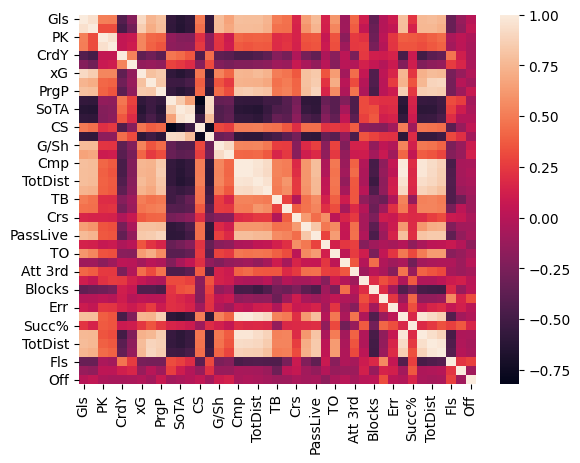

In [37]:
sns.heatmap(Training_set_correlations)

In [38]:
columns = np.full((Training_set_correlations.shape[0],), True, dtype=bool)
for i in range(Training_set_correlations.shape[0]):
    for j in range(i+1, Training_set_correlations.shape[0]):
        if Training_set_correlations.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [41]:
Selected_columns = SerieA_training_data_features.columns[columns]
Selected_columns.shape

(28,)

In [44]:
SerieA_training_data_features_selection = SerieA_training_data_features[Selected_columns]

In [45]:
SerieA_training_data_features_selection.to_csv('/content/drive/My Drive/SerieA_training_data_features_selection.csv', index=False)

In [34]:
SerieA_training_data_features.to_csv('/content/drive/My Drive/SerieA_training_data_features.csv', index=False)

In [57]:
url = "https://fbref.com/en/comps/11/Serie-A-Stats"
stats_list_2023_2024 = create_feature_datasets(url)
SerieA_stats_2023_2024 = pd.concat(stats_list_2023_2024, axis=1)

In [58]:
SerieA_stats_2023_2024

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,2,2,0,0,0,0,1.3,24,52,...,9,0,623,86.7,344,2038,1185,13,9,2
1,Bologna,0,0,0,0,2,0,1.0,22,41,...,4,0,682,23.1,330,2072,1237,10,3,2
2,Cagliari,0,0,0,0,1,0,0.4,7,26,...,10,0,469,80.0,231,1218,519,12,8,2
3,Empoli,0,0,0,0,2,0,0.7,9,15,...,5,1,457,19.0,206,1176,529,17,18,2
4,Fiorentina,4,3,0,0,3,0,1.0,23,44,...,7,0,794,55.6,525,2278,1223,13,11,1
5,Frosinone,1,0,1,1,3,0,0.9,12,30,...,2,0,575,25.0,293,1450,711,14,17,3
6,Genoa,1,1,0,0,2,0,0.2,5,27,...,9,1,420,60.0,197,1093,431,14,10,2
7,Hellas Verona,1,0,0,0,2,0,0.5,16,21,...,11,0,506,28.6,279,1544,626,18,17,3
8,Inter,2,2,0,0,1,0,2.7,23,46,...,9,0,604,35.3,377,1904,1090,8,13,1
9,Juventus,3,2,1,1,3,0,1.8,18,19,...,5,0,606,47.4,361,1787,930,10,9,4


In [61]:
SerieA_stats_2023_2024_f = SerieA_stats_2023_2024[Selected_columns]

In [65]:
squads = SerieA_stats_2023_2024["Squad"]

In [66]:
squads

0          Atalanta
1           Bologna
2          Cagliari
3            Empoli
4        Fiorentina
5         Frosinone
6             Genoa
7     Hellas Verona
8             Inter
9          Juventus
10            Lazio
11            Lecce
12            Milan
13            Monza
14           Napoli
15             Roma
16      Salernitana
17         Sassuolo
18           Torino
19          Udinese
Name: Squad, dtype: object

In [67]:
SerieA_stats_2023_2024_f = SerieA_stats_2023_2024_f.join(squads)

In [69]:
SerieA_stats_2023_2024_f.to_csv('/content/drive/My Drive/SerieA_stats_2023_2024_f.csv', index=False)

Specify URLS



In [ ]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

Loop through the URL list and append them to a pandas dataframe.



In [ ]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

Remove the NAN values



In [ ]:
epl_df = epl_df[epl_df['Wk'].notna()]

Rename the XG columns

In [ ]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

Add the scores columns by slicing.



In [ ]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

Drop the irrelevant fields



In [ ]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)


Order by date

In [ ]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [ ]:
epl_df.sort_values(by='Date', inplace=True)

In [ ]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [ ]:
epl_df

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.5,3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.9,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss
1735,1.0,Sat,2017-08-12,15:00,West Brom,1,1.3,0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.0,Sun,2022-05-22,16:00,Leicester City,4,3.4,1,1.1,Southampton,32003.0,King Power Stadium,Jonathan Moss
438,38.0,Sun,2022-05-22,16:00,Brentford,1,0.8,2,1.3,Leeds United,16957.0,Brentford Community Stadium,Paul Tierney
446,38.0,Sun,2022-05-22,16:00,Burnley,1,1.6,2,1.8,Newcastle Utd,21361.0,Turf Moor,Craig Pawson
440,38.0,Sun,2022-05-22,16:00,Crystal Palace,1,0.6,0,0.7,Manchester Utd,25434.0,Selhurst Park,Martin Atkinson
